In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
columns=['Id', 'Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv("glass.data", names=columns) 
df.head()

,Id,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 1) Construct the classifier to predict type of glass with-out the use of PCA

## Split data 

In [3]:
X = df.loc[:, df.columns != 'Type of glass']
y = df.loc[:,['Type of glass']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1992)
X_train.head()

,Id,Rl,Na,Mg,Al,Si,K,Ca,Ba,Fe
107,108,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
72,73,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.0,0.00
11,12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00
134,135,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.00
14,15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.00


## Normalize

In [4]:
normalize = StandardScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy = []
# Calculating error for K values between 1 and 20
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
accuracy

C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[0.8153846153846154,
 0.7076923076923077,
 0.7230769230769231,
 0.6307692307692307,
 0.6307692307692307,
 0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154,
 0.6]

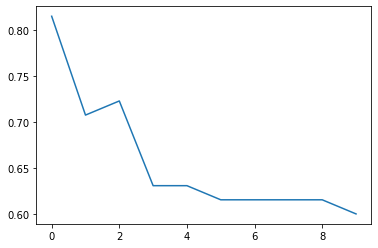

In [6]:
plt.plot(accuracy)

## confusion-matrix for each k

In [7]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       0.74      0.85      0.79        27
           3       1.00      0.60      0.75        10
           5       0.33      0.50      0.40         2
           6       1.00      0.80      0.89         5
           7       1.00      0.71      0.83         7

    accuracy                           0.82        65
   macro avg       0.83      0.74      0.77        65
weighted avg       0.85      0.82      0.82        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [8]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       0.64      0.93      0.76        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       1.00      0.40      0.57         5
           7       1.00      0.71      0.83         7

    accuracy                           0.71        65
   macro avg       0.58      0.51      0.51        65
weighted avg       0.63      0.71      0.64        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       0.68      0.93      0.78        27
           3       0.50      0.10      0.17        10
           5       0.00      0.00      0.00         2
           6       0.67      0.40      0.50         5
           7       1.00      0.71      0.83         7

    accuracy                           0.72        65
   macro avg       0.62      0.52      0.54        65
weighted avg       0.71      0.72      0.68        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [10]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.62      0.85      0.72        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.63        65
   macro avg       0.39      0.40      0.38        65
weighted avg       0.52      0.63      0.56        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.61      0.85      0.71        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.63        65
   macro avg       0.39      0.40      0.38        65
weighted avg       0.52      0.63      0.56        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.61      0.81      0.70        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.62        65
   macro avg       0.39      0.40      0.37        65
weighted avg       0.51      0.62      0.55        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.56      0.81      0.67        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.62        65
   macro avg       0.38      0.40      0.37        65
weighted avg       0.49      0.62      0.53        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.55      0.81      0.66        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.62        65
   macro avg       0.38      0.40      0.37        65
weighted avg       0.49      0.62      0.53        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.56      0.81      0.67        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.62        65
   macro avg       0.38      0.40      0.37        65
weighted avg       0.50      0.62      0.54        65



In [16]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.55      0.78      0.65        27
           3       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       1.00      0.57      0.73         7

    accuracy                           0.60        65
   macro avg       0.38      0.39      0.37        65
weighted avg       0.49      0.60      0.52        65



C:\Users\Nu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
